In [1]:
import pandas as pd    #  pip install pandas

In [2]:
from pathlib import Path

In [45]:
import matplotlib.pyplot as plt

In [283]:
import numpy as np

In [ ]:
import seaborn as sns
%matplotlib inline 

In [4]:
#data_dir = Path("/Users/romanchepenko/Desktop/diplom/duma_analysis/data/duma_csv")

#df = pd.concat([pd.read_csv(f) for f in data_dir.glob("*.csv")], ignore_index=True)
#df.to_csv("/Users/romanchepenko/Desktop/diplom/duma_analysis/code/result.csv", index=False)

In [ ]:
/Users/romanchepenko/Desktop/diplom/duma_analysis/data/duma_csv

In [325]:
def funcPositive(x):
    if x >= 0.7:
        return 'Positive'
    elif x >= 0.5:
        return 'Neutral'
    else:
        return 'Negative'

In [568]:
df = pd.read_csv('/Users/romanchepenko/Desktop/diplom/duma_analysis/data/duma_csv/1993.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/romanchepenko/Desktop/diplom/duma_analysis/data/duma_csv/1993.csv'

In [560]:
df = df.drop(columns = ['Unnamed: 0'],axis = 1)
patternDel = "Думы [А-Я|A-Z]. [А-Я|A-Z]."
filter = df['name'].str.contains(patternDel)
df = df[~filter]
df['pos'] = df['senti_score'].replace(to_replace ='[\]\[]', value = '', regex = True)
df[['positive_prob','negative_prob']] = df['pos'].str.split(' ', n=1, expand=True)
df = df.drop(columns = ['senti_score', 'pos'],axis = 1)
df['text'] = df['text'].replace(to_replace ='\n', value = '', regex = True)
df['positive_prob'] = pd.to_numeric(df['positive_prob'])
df['negative_prob'] = pd.to_numeric(df['negative_prob'])
df['positive'] = df['positive_prob'].apply(funcPositive)
df['Norm'] = df['text_w_length'].apply(lambda x: 'True' if x <= 3500 else 'False')
df = df[df['Norm'] != 'False']
df = df.drop(columns = ['Norm'],axis = 1)
df['performances'] = df.groupby(['name'])['text'].transform('count')
df

,name,text,text_length,text_w_length,positive_prob,negative_prob,positive,performances
0,Председательствующий.,Дорогие депутаты Государственной Думы! Прошу ...,3499,445,0.782014,0.217986,Positive,12682
1,"Апарина А.В.,","избирательное объединение ""Коммунистическая п...",398,46,0.158604,0.841396,Negative,21
2,Председательствующий.,Возражений нет. (Все встают. Минута молчания....,7638,970,0.640742,0.359258,Neutral,12682
3,Председательствующий.,После заслушивания приветственного выступлени...,854,104,0.985506,0.014494,Positive,12682
4,"Иванченко А.В.,",заместитель Председателя Центральной избирате...,16129,1955,0.868668,0.131332,Positive,4
...,...,...,...,...,...,...,...,...
17428,Председательствующий.,Вот Вешняков Александр Альбертович. Поднимите...,1615,227,0.999992,0.000008,Positive,12682
17429,Председательствующий.,"Ольга Кирилловна, покажитесь, пожалуйста. Вот...",2827,389,0.724939,0.275061,Positive,12682
17430,Председательствующий.,Нет.Исаков В.Б. ...что пять кандидатур...,44,6,0.955550,0.044450,Positive,12682
17431,Председательствующий.,"Нет, Владимир Борисович, уже были возражения....",195,29,0.740500,0.259500,Positive,12682


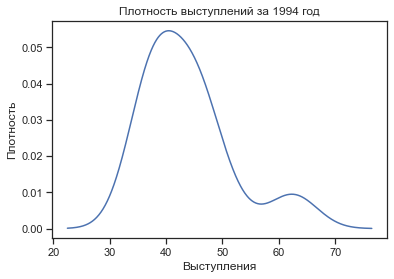

In [561]:
patternDel = "Председательствующий."
filter = df['name'].str.contains(patternDel)
dff = df[~filter]
df1 = dff['name'].value_counts()
df1[:20].plot(kind='kde')
plt.title("Плотность выступлений за 1994 год")
plt.xlabel("Выступления")
plt.ylabel("Плотность")
plt.savefig('speeches_kde_1994.png')

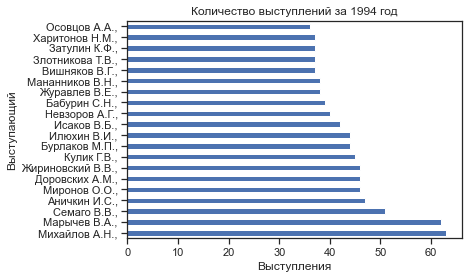

In [562]:
plot2 = df1[:20].plot(kind='barh')
#fig = plot2.get_figure()
#fig.savefig("top_speaker_2022.png") 
plt.title("Количество выступлений за 1994 год")
plt.xlabel("Выступления")
plt.ylabel("Выступающий")
plt.savefig('top_speaker_1994.png')

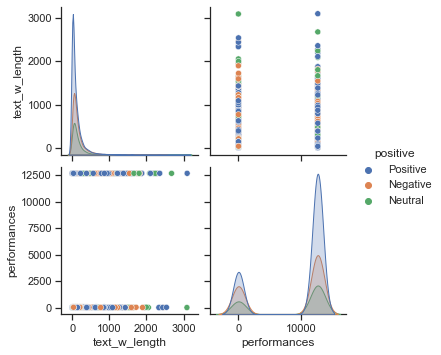

In [563]:
df = df.drop(columns = ['positive_prob', 'negative_prob', 'text_length'],axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(df, hue="positive")
plt.savefig("matrix_with_1994.png") 

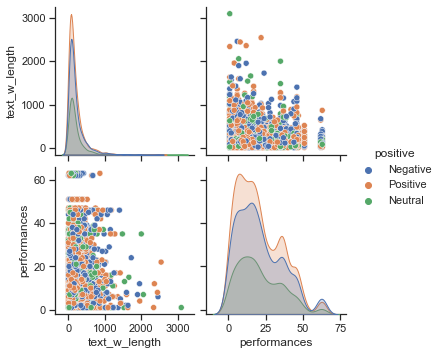

In [564]:
#sns.jointplot(data=df, x="text_w_length", y="name", height=5, ratio=2, marginal_ticks=True)

# Без Председательствующего
df = df[df['name'] != 'Председательствующий.']
sns.set_theme(style="ticks")
sns.pairplot(df, hue="positive")
plt.savefig("matrix_without_1994.png")

/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


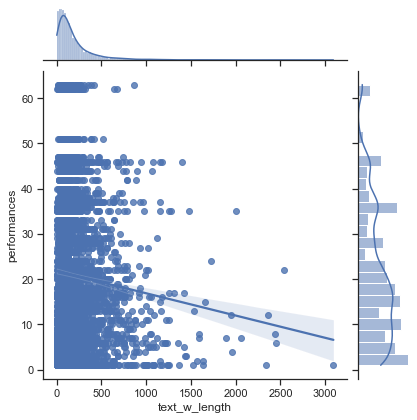

In [565]:
sns.jointplot("text_w_length", "performances", data=df, kind='reg');
plt.savefig("jointplot_1994.png")

/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


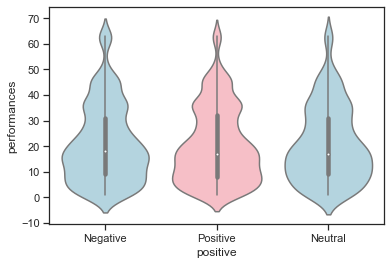

In [566]:
sns.violinplot("positive", "performances", data=df,
               palette=["lightblue", "lightpink"]);
plt.savefig("violinplot_1994.png")

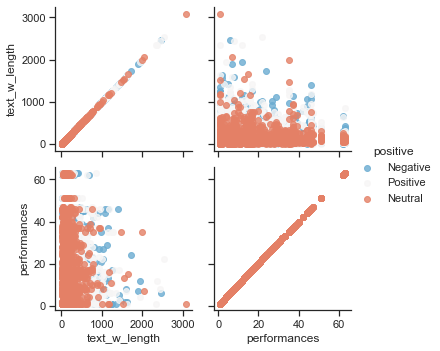

In [567]:
g = sns.PairGrid(data=df, vars=['text_w_length', 'performances'],
                 hue='positive', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
plt.savefig("pairGrid_1994.png")